In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


font = {'color':  'blue',
        'weight': 'normal',
        'size': 20,
        }

In [2]:
def module(z):
    mod = np.sqrt(z*np.conjugate(z))
    return mod

def conj(z):
    con = np.conjugate(z)
    return con

In [3]:
def integral_simps_of_two_arrays(ys, xs):
    x_range = []
    y_range = []
    results = []
    for x in range(len(xs)):
        x_range.append(xs[x])
        y_range.append(ys[x])
        integral = integrate.simps(y_range, x_range)
        results.append(integral)
    results = np.array(results)
    return results

### Units: 
#### $c = \hbar = 1$ and $M_{PL}$

In [4]:
c = np.float64(1.0) #Speed of light
G = np.float64(1.0) #Gravitational constant


kappa_c = np.float64(1.0/3.0)

#   ln(10^10 As) = 3.040 ± 0.016
ns = 0.9665 #Spectral scalar index
As = np.exp(3.040)/(10.0**10.0)


k0 = 0.05/((8.06554393734921*(10.0**5.0))*(10.0**8.0)*(3.24078**23.0))         # 0.05 Mpc^-1  
#             mtrs            eV 

#H_end = ((k0/a_end)**((1.0-ns)/(3.0-ns)))*(9.0*(np.pi**2.0)*As)**(1.0/(3.0-ns))  #At the end of inflation in M_pl


#H_end = np.float64((10.0**-10.0)/np.sqrt(3.0)) #Mpl      

H_end = np.float64((10.0**-9)/np.sqrt(3.0)) #Mpl
Pc_0 = 0.0
n = 10.0
e_folds = 3.0
mu_val = n*H_end  # In M_pl units
t_end = 2.0/(3.0*H_end)   # 10^-32  segundos
t_f = t_end*np.exp(3.0*e_folds/2.0)



rho_end = 3.0*(H_end**2.0)    #Mpl^4

H_end, rho_end, e_folds

(5.773502691896259e-10, 1.0000000000000005e-18, 3.0)

In [5]:
H_end_GeV = H_end*((2.435)*10.0**(18.0))
H_end_GeV < 8.0*(10.0**(13.0))

True

In [6]:
H_end_GeV/10.0**12.0

0.001405847905476739

In [7]:
t_f/t_end

90.01713130052181

# $T_{r}$

## $\rho_r = \dfrac{\pi}{30} g_* T_r^4$

# During oscillatory stage

## $\dfrac{H_{end}}{H_r} = \dfrac{\rho_{end}}{\rho_r} = \left(\dfrac{a_{r}}{a_{end}} \right)^3 = \dfrac{\rho_{end}}{\dfrac{\pi}{30} g_* T_r^4}  = e^{3N}$


# while retaining successful Big Bang Nucleosynthesis (BBN) 
# requires $T_r > 4$ MeV = 0.004 GeV. 
https://arxiv.org/pdf/1804.08639.pdf

In [8]:
g_star = 120.0
T_r = (np.exp(-3.0*e_folds/4.0))*((30.0*rho_end)/(g_star*np.pi))**(1.0/4.0)
T_r_GeV = T_r*(((2.435)*10.0**(18.0))/10.0**12)
T_r_GeV

4.310562190685055

In [9]:
T_r_GeV > 0.0004

True

# During matter-radiation equality:

# $\rho_r = \rho_{eq} \left(\dfrac{a_r}{a_{eq}} \right)^{-4} $

# According with Planck 2018

### $z_{eq} \approx  3387 $
### $\Omega_m \approx 0.3158 $


# $ \rho_{eq} \left(\dfrac{a_{eq}}{a_{r}} \right)^{4} = \dfrac{\pi}{30} g_* T_r^4 $

In [10]:
a_eq = 1.0/3387.0
omega_eq_m = 0.5
H_0 = 67.32
H_0_Mpl = (1.118*np.sqrt(8.0*np.pi))*10**(-61)

rho_eq = 6.0*omega_eq_m*(H_0_Mpl**2.0)/a_eq**3.0
a_f = ((30.0*rho_eq/(np.pi*g_star*T_r**4.0))**(1.0/4.0))
a_f

1.3124572375688333e-22

In [11]:
a_end = a_f*np.exp(-e_folds)
a_end

6.534339821673736e-24

In [12]:
#H_end = (((a_end/k0)**((1.0-ns)/(3.0-ns))))*((9.0*(np.pi**2.0)*As)**(1.0/(3.0-ns)))  #At the end of inflation in M_pl
#H_end

In [13]:
NN = 100

Hend_array = np.zeros(NN)


Hend_array[0] = 0.5*np.float64(10.0**(-10.0))

for ii in range(NN-1):
    Hend_array[ii+1] = Hend_array[ii]*1.3
    
Hend_array = Hend_array[Hend_array < 10**-1]
            
e_folds_array = np.linspace(0.0,10, len(Hend_array))

In [14]:
Hend_arr, e_folds_arr = np.meshgrid(Hend_array, e_folds_array)
rhoend_array = 3.0*(Hend_arr**2.0)/(8.0*np.pi) 
Tr_array = (np.exp(-3.0*e_folds_arr/4.0))*((Hend_arr**2.0)/3.0)**(1.0/4.0)
np.min(Tr_array)

2.971639169612121e-09

In [15]:
H_end, e_folds

(5.773502691896259e-10, 3.0)

In [16]:
H_sat = (10.0**-2, 10.0**-3.0, 10.0**-4.0, 10.0**-5.0, 10.0**-6.0, 10.0**-7.0, 10.0**-8.0, 10.0**-9.0, 10**-10.0)/np.sqrt(3.0)
N_sat = (0.005, 0.64, 1.28, 1.96, 2.68, 3.43, 4.2, 4.95,6.05)

In [17]:
from matplotlib import ticker, cm

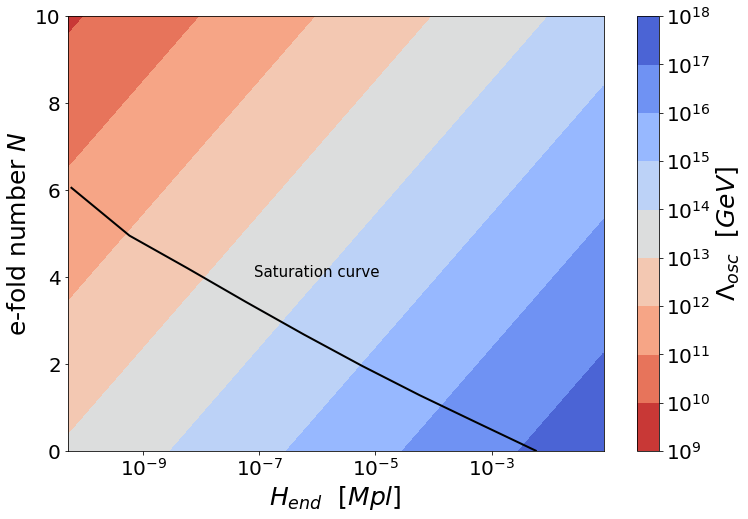

In [18]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

plt.contourf(Hend_arr,e_folds_arr, Tr_array*((2.435)*10.0**(18.0)), 1,  cmap='coolwarm_r',locator=ticker.LogLocator())
plt.plot(H_sat, N_sat, '-', lw=2.0,  color = 'black')
#plt.xscale('log')
plt.xscale('log')

plt.ylabel(r'e-fold number $N$',fontsize=25)
plt.xlabel(r'$H_{end} \ \ [Mpl]$',fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.axvline(x=0.004, color='white', linestyle='-')
#plt.axvline(x=10.0**7.0, color='white', linestyle='-')

#plt.axvline(x=T_r_GeV, color='magenta', linestyle='-')

#plt.axhline(y=10.0**13.0, color='white', linestyle='-')
#plt.axhline(y=H_end, color='magenta', linestyle='-')


plt.text(0.8*10.0**(-7.0), 4.0 , r'Saturation curve', {'color': 'black', 'fontsize': 15})



plt.ylim(0,10)
cbar = plt.colorbar()
cbar.set_label(r'$\Lambda_{osc} \ \ [GeV]$' , fontsize=25,)

font_size = 20 # Adjust as appropriate.
cbar.ax.tick_params(labelsize=font_size)


plt.savefig('contour.pdf')
plt.show()

# Initial condition for Complex case

In [19]:
Csqrt = (a_end**(3./2.))*np.sqrt((H_end**2.0) - (Pc_0*kappa_c))

numer_complex = Csqrt

denom_complex = np.sqrt(2.0*kappa_c)*mu_val*np.exp(1j*((mu_val*t_end)))

C1 = numer_complex/denom_complex

phi_complex0 = ((C1*np.exp(1j*((mu_val*t_end))))*(a_end**(-3./2.))).real
Pi_complex0 = (C1*1j*mu_val*np.exp(1j*((mu_val*t_end)))) - (phi_complex0/t_end)

print('Complex initial values: \n' )
phi_complex0, Pi_complex0

Complex initial values: 



(0.12247448713915894, (-1.0606601717798219e-10+1.1811024674998382e-44j))

In [20]:
T = 3.0/(2.0*n)

#Step size
step_size = T/10.

tau_0 = 1.0 
tau_f = t_f/t_end
N = int((tau_f-tau_0)/step_size)
N

5934

In [21]:
t_array = np.linspace(tau_0,tau_f,N)*t_end
t_array

array([1.15470054e+09, 1.17202535e+09, 1.18935017e+09, ...,
       1.03908180e+11, 1.03925505e+11, 1.03942830e+11])

In [22]:
#Complex
phi_complex = (C1*np.exp(1j*((mu_val*t_array))))*(a_end**(-3./2.))*t_end/t_array
Pi_complex = (1j*mu_val*phi_complex) - (phi_complex/t_array)

In [23]:
Pi_complex0, Pi_complex[0]

((-1.0606601717798219e-10+1.1811024674998382e-44j),
 (-1.0606601717798219e-10+7.071067811865479e-10j))

# $H^2$

In [24]:
H2_complex = kappa_c*((Pi_complex*np.conjugate(Pi_complex)) + (phi_complex*np.conjugate(phi_complex)*mu_val**2.0))
H2_constraint = ((H_end**2.0))/((t_array/t_end)**2.0)

# Pressure

In [25]:
P_complex = (Pi_complex*np.conjugate(Pi_complex)) - (phi_complex*np.conjugate(phi_complex)*mu_val**2.0)
P_complex[0]

(1.1250000000000133e-20+0j)

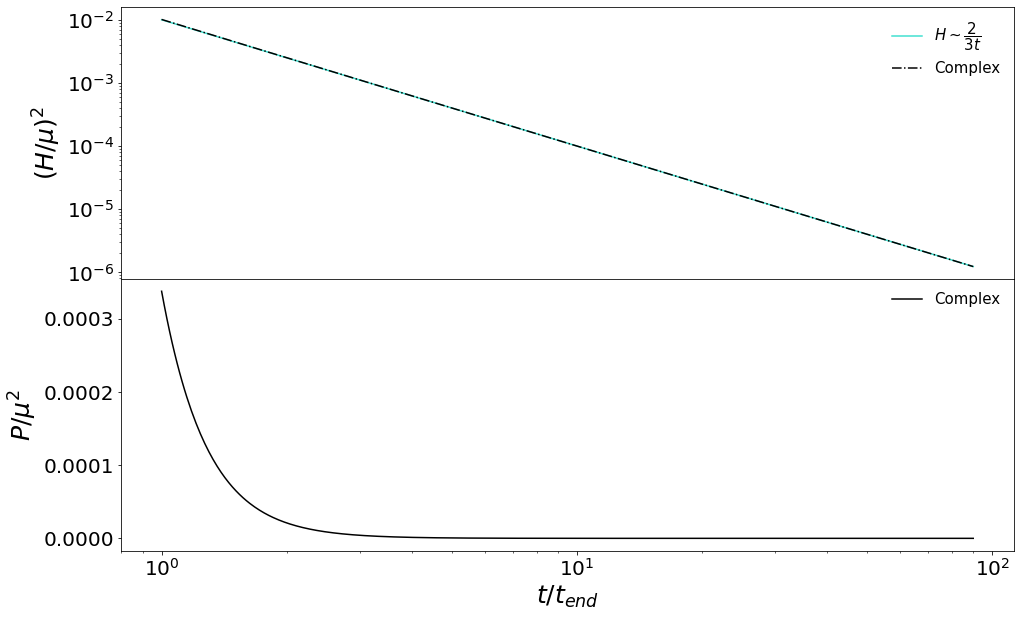

In [26]:
figure, axs = plt.subplots(2, figsize = (16,10), sharex=True, sharey=False, gridspec_kw={'hspace': 0})

axs[0].plot(t_array/t_end, H2_constraint/mu_val**2, '-',  color='turquoise', label= r'$ H \sim \dfrac{2}{3t}$')
axs[0].plot(t_array/t_end, H2_complex.real/mu_val**2 , '-.', color='black', label= r'Complex')

axs[0].legend(loc='upper right', frameon=False,  fontsize = 15)
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[1].plot(t_array/t_end, P_complex.real/mu_val**2.0, '-', color='black', label= r'Complex')

axs[1].legend(loc='upper right', frameon=False, fontsize = 15)
#axs[1].set_xlim(0.9,5)
axs[1].set_xscale('log')
#axs[1].set_yscale('symlog')

axs[1].set_xlabel(r'$t/t_{end}$',fontsize=25)
axs[0].set_ylabel(r'$(H/\mu)^2$',fontsize=25)
axs[1].set_ylabel(r'$P/\mu^2$',fontsize=25)

axs[0].tick_params(axis = 'both', which = 'major', labelsize = 20)
axs[1].tick_params(axis = 'both', which = 'major', labelsize = 20)


plt.subplots_adjust(hspace=0.25)

#plt.savefig('H_and_P.pdf')
plt.show()

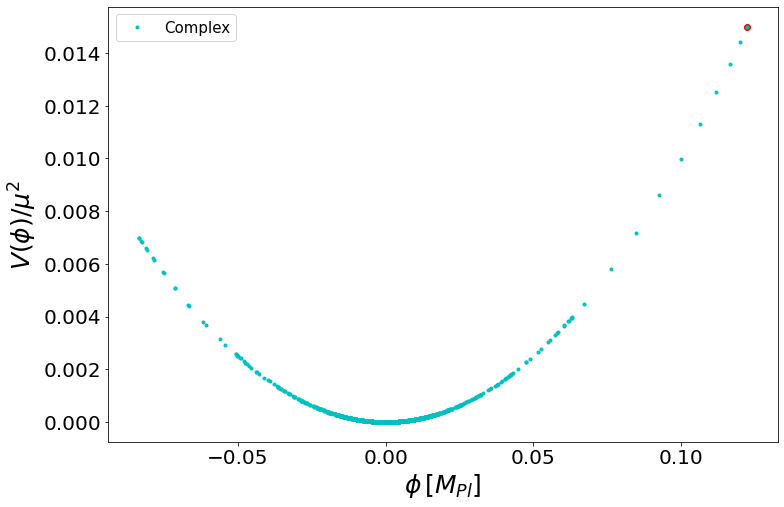

In [27]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

plt.plot(phi_complex[0].real, np.conjugate(phi_complex[0].real)*phi_complex[0].real,  'o', color='red')
plt.plot(phi_complex.real, np.conjugate(phi_complex.real)*phi_complex.real,  '.', color='c', label = 'Complex')

plt.xlabel(r'$\phi \, [M_{Pl}]$',fontsize=25)
plt.ylabel(r'$V(\phi)/\mu^2$',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)
plt.show()

## e-folds

 
### $N = log(a) = \int^{t_f}_{t_i} H dt$

In [28]:
H2_complex.real, t_array 

(array([3.37083333e-19, 3.27084677e-19, 3.17525815e-19, ...,
        4.11640983e-23, 4.11503749e-23, 4.11366585e-23]),
 array([1.15470054e+09, 1.17202535e+09, 1.18935017e+09, ...,
        1.03908180e+11, 1.03925505e+11, 1.03942830e+11]))

In [29]:
from scipy import integrate
loga_complex = integrate.cumtrapz(np.sqrt(H2_complex.real), t_array)
loga_analytic = 2.*np.log(t_array/t_end)/3.

## Analytic solution
### $a(t) = a_{end} \left( \dfrac{t}{t_{end}}\right)^{\dfrac{2}{3}} $

In [30]:
a_complex =a_end*np.exp(loga_complex.real - loga_complex[0].real)
a_analytic = a_end*np.exp(loga_analytic)
a_analytic[0], a_complex[0], a_end

(6.534339821673736e-24, 6.534339821673736e-24, 6.534339821673736e-24)

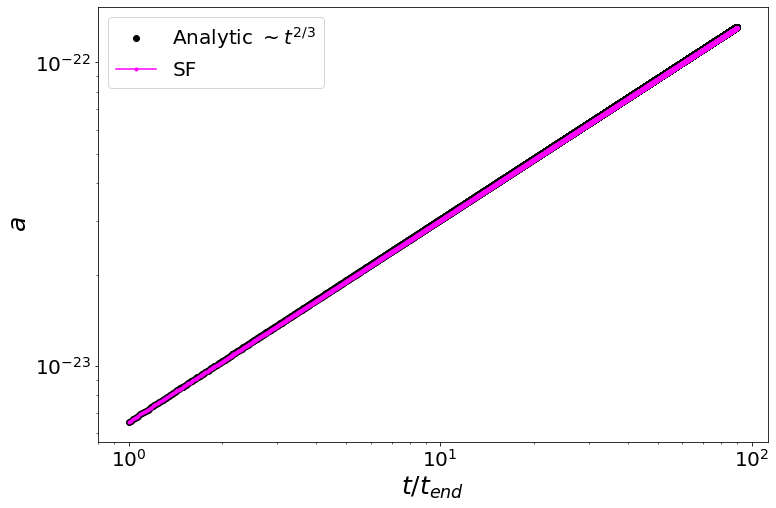

In [31]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

plt.plot(t_array/t_end, a_analytic, 'o',  color='black', label= r'Analytic $\sim t^{2/3}$')
plt.plot(t_array[0:-1]/t_end, a_complex,  '.-', color='magenta', label= r'SF')

plt.xlabel(r'$t/t_{end}$',fontsize=25)
plt.ylabel(r'$a$',fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.xscale('log')
plt.yscale('log')

plt.show()

In [32]:
np.log(a_analytic[-1]/a_analytic[0])

3.0

## Conformal time

### $ \eta = \int^{t_f}_{t_i}  \dfrac{dt}{a}$

In [33]:
eta_array = integrate.cumtrapz(1.0/a_analytic, t_array)

In [34]:
eta_analytic = (3.0*t_end*( ((t_array/t_end)**(1./3.)) - 1.0 )/a_end) + eta_array[0]

In [35]:
eta_end = eta_array[0]
eta_f = eta_array[-1]
eta_end, eta_f

(2.638252567781678e+30, 1.8457777669703102e+33)

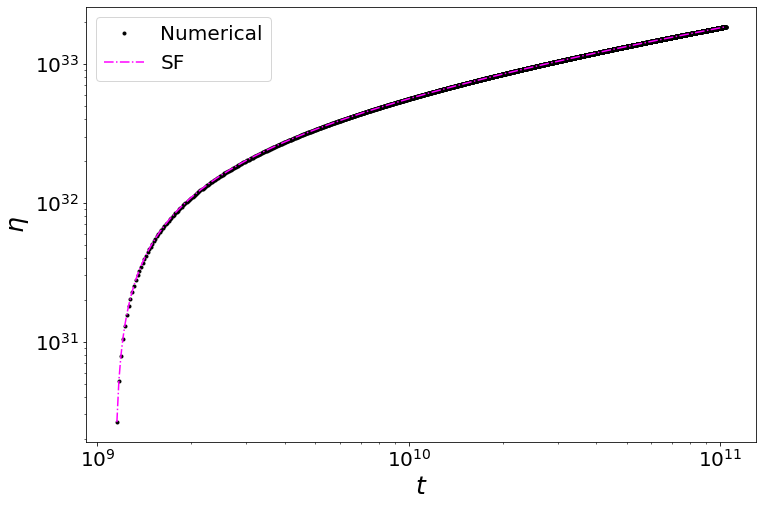

In [36]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

plt.plot(t_array[0:-1], eta_array, '.',  color='black', label= r'Numerical')
plt.plot(t_array, eta_analytic,  '-.', color='magenta', label= r'SF')

plt.xlabel(r'$t$',fontsize=25)
plt.ylabel(r'$\eta$',fontsize=25)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.xscale('log')
plt.yscale('log')

plt.show()

# Hubble conformal
## $\mathcal{H} = aH $

In [37]:
Ha_conf = np.sqrt(H2_constraint[0:-1])*a_analytic[0:-1]
Hc_conf = np.sqrt(H2_complex)*a_analytic

In [38]:
Pic_conf = Pi_complex*a_analytic

In [39]:
zc_MS_numerical = - ((mu_val*a_analytic)**2.0)*(1.0 + (3.0*Hc_conf*phi_complex/Pic_conf)) + ((Hc_conf**2.0)/2.0) #This is z''/z with H^2 << \mu^2
zc_MS_analytic = - ((mu_val*a_analytic)**2.0)*(1.0 - (3.0*1j*Hc_conf/(mu_val*a_analytic))) + ((Hc_conf**2.0)/2.0)

kc_numerical = np.sqrt(module(zc_MS_numerical)).real
kc_analytic = np.sqrt(module(zc_MS_analytic)).real
kc_analytic, kc_numerical

(array([3.84671522e-32, 3.88293697e-32, 3.91902015e-32, ...,
        7.57581003e-31, 7.57665209e-31, 7.57749410e-31]),
 array([3.76395000e-32, 3.80173954e-32, 3.83934009e-32, ...,
        7.57578898e-31, 7.57663104e-31, 7.57747306e-31]))

# M-S dynamical system.
## $u'_k = v_k $
## $v'_k = \left( -k^2 + \dfrac{z''}{z} \right) u_k$
# with $\left(\dfrac{z''}{z}\right)_{{(complex,real)}}$

In [40]:
def Equation_MS1_complex(eta2, uk2, vk2, k2_eff):
    return vk2

def Equation_MS2_complex(eta2, uk2, vk2, k2_eff):
    return -uk2*k2_eff

In [41]:
def RK4_MS_complex(F1, F2, u_initial, v_initial, k2_scale): #RUNGE-KUTTA 4th order
    
    M = len(t_array) + 1
    step_size = (eta_f - eta_end)/M  
    
    a_arr = []
    z_arr = [] 
    z_prime_arr = []
    HC2_arr = []
    u_arr = []
    v_arr = []
    

    eta = eta_end
    a = a_analytic[0]
    u = u_initial
    v = v_initial
    
    j = 0
    
    while eta <= eta_f:
        
        t_conf = t_end*((a_end*(eta-eta_end)/(3.0*t_end)) + 1.0 )**3.0
        
        phi_C = (C1*(a_end**(-3./2.))*np.exp(1j*((mu_val*t_conf))))*t_end/t_conf
        Pi_C = (1j*mu_val*phi_C) - (phi_C/t_conf)
        
        Pic_C = a*Pi_C
         
        HC2_conformal = kappa_c*((Pic_C*np.conjugate(Pic_C)) + ((phi_C*np.conjugate(phi_C)*(mu_val*a)**2)))

        
        k_J2 = ((-(a*mu_val)**2.0)*(1.0 + (3.0*np.sqrt(HC2_conformal)*phi_C/Pic_C))) + ((HC2_conformal)/2.0)
        
        k_eff = k2_scale - np.conjugate(k_J2)
        #print eta_array[j], u_array[j], k2eff_array[j]
        
        
        a_arr.append(a)
        HC2_arr.append(HC2_conformal)
        z_arr.append(a*Pic_C/np.sqrt(HC2_conformal))
        z_prime_arr.append(-(a*Pic_C/2.0) - ((a**3.0)*(mu_val**2.0)*phi_C/np.sqrt(HC2_conformal)))
        u_arr.append(u)
        v_arr.append(v)
        
        
     
        k11 = step_size*F1(eta, u, v, k_eff)
        k12 = step_size*F2(eta, u, v, k_eff)
    
        k21 = step_size*F1(eta + (step_size/2.0), u + (k11/2.0), v + (k12/2.0), k_eff)   
        k22 = step_size*F2(eta + (step_size/2.0), u + (k11/2.0), v + (k12/2.0), k_eff)

        k31 = step_size*F1(eta + (step_size/2.0), u + (k21/2.0), v + (k22/2.0), k_eff)
        k32 = step_size*F2(eta + (step_size/2.0), u + (k21/2.0), v + (k22/2.0), k_eff)

        k41 = step_size*F1(eta + step_size, u + k31, v + k32, k_eff)
        k42 = step_size*F2(eta + step_size, u + k31, v + k32, k_eff)
        
        
        eta = eta + step_size
        a = a_end*(t_conf/t_end)**(2.0/3.0)
        u = u + (k11 + (2.0*k21) + (2.0*k31) + k41)/6.0
        v = v + (k12 + (2.0*k22) + (2.0*k32) + k42)/6.0

        
        j = j + 1

    return np.array(a_arr), np.array(u_arr), np.array(v_arr), np.array(z_arr), np.array(z_prime_arr), np.array(HC2_arr)

In [42]:
kc_analytic[0]

3.846715223967531e-32

In [43]:
k_min = a_analytic[-1]*np.sqrt(H2_complex[-1].real)
k_max = kc_analytic[-1]
k_min, k_max

(8.417820635647857e-34, 7.577494096754908e-31)

In [44]:
#k_array = np.linspace(k_min,k_max,100)
#k_array

In [45]:
#k2_array = k_array**2.0

In [46]:
LL = 1000

k2_array = np.zeros(LL)
k2_array[0] = (k_min.real**2.0)


for ii in range(LL - 1):
    k2_array[ii+1] = k2_array[ii]*1.15
    if k2_array[ii] > k_max**2.0:
        k2_array = k2_array[k2_array <= k_max**2.0]        
        break
        
        
k2_array = k2_array[k2_array>0]    
k_array = np.sqrt(k2_array)

k2_array, len(k_array)

(array([7.08597043e-67, 8.14886599e-67, 9.37119589e-67, 1.07768753e-66,
        1.23934066e-66, 1.42524175e-66, 1.63902802e-66, 1.88488222e-66,
        2.16761455e-66, 2.49275674e-66, 2.86667025e-66, 3.29667078e-66,
        3.79117140e-66, 4.35984711e-66, 5.01382418e-66, 5.76589781e-66,
        6.63078248e-66, 7.62539985e-66, 8.76920982e-66, 1.00845913e-65,
        1.15972800e-65, 1.33368720e-65, 1.53374028e-65, 1.76380132e-65,
        2.02837152e-65, 2.33262725e-65, 2.68252133e-65, 3.08489953e-65,
        3.54763446e-65, 4.07977963e-65, 4.69174658e-65, 5.39550857e-65,
        6.20483485e-65, 7.13556008e-65, 8.20589409e-65, 9.43677820e-65,
        1.08522949e-64, 1.24801392e-64, 1.43521601e-64, 1.65049841e-64,
        1.89807317e-64, 2.18278414e-64, 2.51020176e-64, 2.88673203e-64,
        3.31974183e-64, 3.81770311e-64, 4.39035857e-64, 5.04891236e-64,
        5.80624921e-64, 6.67718659e-64, 7.67876458e-64, 8.83057927e-64,
        1.01551662e-63, 1.16784411e-63, 1.34302072e-63, 1.544473

# $k_{end} = a_{end}H_{end}$ 

In [47]:
k_end = a_end*H_end #M_pl^-1
k_final = a_analytic[-1]*np.sqrt(H2_complex[-1].real)

k_end, k_final

(3.7726028550198235e-33, 8.417820635647857e-34)

In [48]:
R_H_end = 1.0/np.sqrt(H2_complex[0].real)
R_Hf = 1.0/np.sqrt(H2_complex[-1].real)
R_H_end, R_Hf

(1722389463.3720987, 155914136731.6415)

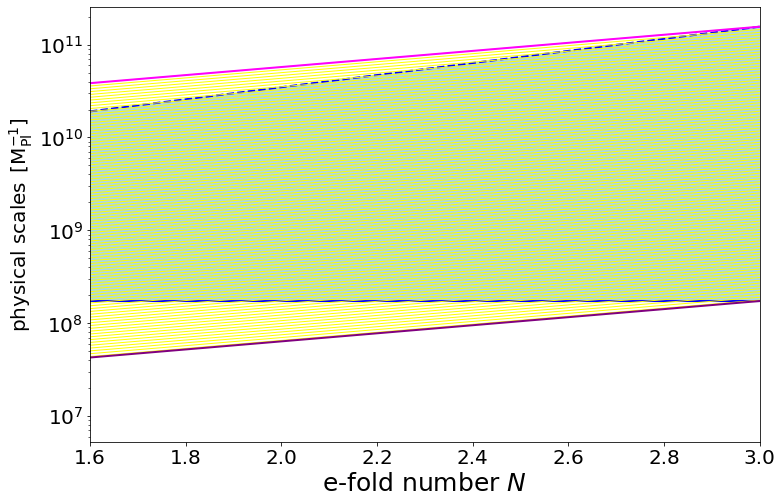

In [49]:
figure, ax = plt.subplots(1,figsize = (12,8),  sharex=True, sharey=True)

plt.plot(np.log(a_analytic/a_analytic[0]),  1.0/(np.sqrt(H2_complex.real)),  '--', lw =2.0, color='blue')

plt.fill_between(np.log(a_analytic/a_analytic[0]), a_analytic/kc_analytic.real, 1.0/(np.sqrt(H2_complex.real)), color='lightblue')

plt.plot(np.log(a_analytic/a_analytic[0]),  a_analytic/kc_analytic.real,  '-', lw =2.0, color='blue')

#plt.plot(np.log(a_analytic/a_analytic[0]),  1.0/np.sqrt((3.0*np.sqrt(H2_complex.real)*mu_val)),  '-', lw =2.0, color='green')



j = 0
for i in range(len(k_array)):
    if j >= len(k_array):
        break
    plt.plot(np.log(a_analytic/a_analytic[0]),  a_analytic/(k_array[j].real),  '-', lw =1, color='yellow')

    j = i + 1  
    
    
plt.plot(np.log(a_analytic/a_analytic[0]),  a_analytic/k_max.real,  '-', lw =2.0, color='purple')
plt.plot(np.log(a_analytic/a_analytic[0]),  a_analytic/k_min.real,  '-', lw =2.0, color='magenta')
#plt.plot(np.log(a_analytic/a_analytic[0]),  2.0*np.pi*a_analytic/(1.1*k_array[4].real),  '-', lw =2.0, color='magenta')

#ax.hlines(1.0/np.sqrt(k2_array[11]), xmin=0, xmax=5, linewidth=2, color='green')
#ax.hlines(1.0/k_array, xmin=0, xmax=e_folds, linewidth=2, color='purple')
#ax.hlines(1.0/k_end, xmin=0, xmax=e_folds, linewidth=2, color='red')

plt.tick_params(axis = 'both', which = 'major', labelsize = 16)

#plt.text(e_folds - 2.5, a_analytic[-1]/(1.8*k_min.real) , r'$k_{\rm min}$', {'color': 'magenta', 'fontsize': 25})

#plt.text(e_folds - 7.5 , (1.0/(20000*np.sqrt(H2_complex[0].real))) , r'$k_{\rm H}$', {'color': 'blue', 'fontsize': 25})


#plt.text(e_folds - 2.5, a_analytic[-1]/(100.5*k_max.real) , r'$k_{\rm max}$', {'color': 'purple', 'fontsize': 25})

#plt.text(e_folds - 7.5, a_analytic[-1]/(10.5*kc_analytic[0].real) , r'$k_{\rm J}$', {'color': 'blue', 'fontsize': 25})

#plt.text(e_folds - 2.5, a_analytic[-1]/(0.007*kc_analytic[-1].real) , r'Mathieu instability', {'color': 'green', 'fontsize': 20})



plt.xlabel(r'e-fold number $N$',fontsize=25)

plt.xlim(1.6,e_folds)
plt.ylabel(r'physical scales $ \, \rm [M_{Pl}^{-1}]$',fontsize=20)

plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig('complex_scales.png')
plt.show()

In [50]:
np.exp(-1j*k_array[0]*eta_end)/np.sqrt(2.0*k_array[0])

(2.4371603125400196e+16-54125366301536.1j)

In [51]:
nu_phi =  2.0 - ns/2.0
k_J = k_end*np.sqrt(3.0*np.sqrt(15.0)/2.0)

In [52]:
def delta_k(k2_arr):
    
    k_arr = np.sqrt(k2_arr)
    ac_modes = []
    zetac_modes = []
    deltac_k = []
    
    term_1 = []
    term_2 = []
    

    nu_phi =  2.0 - ns/2.0   #observacional
    #nu_phi = (3.0/2.0) + ((1.0 - ns)/2.0)
    l=0
    
    
    while l < (len(k_arr)):

        if k_arr[l] >= k_end:
            
            uc0 = np.exp(-1j*k_arr[l]*eta_end)/np.sqrt(2.0*k_arr[l])
            vc0 = -1j*k_arr[l]*uc0 
            print ("Small scales", l)
        
        else:
            
            uc0 = a_end*(np.exp(-1j*k_arr[l]*eta_end))*H_end*((k_arr[l]/(a_end*H_end))**((3.0/2.0) - nu_phi))/np.sqrt(2.0*k_arr[l]**3.0)
            vc0 = a_end*H_end*uc0*( (5.0/2.0) + nu_phi - (2.0*1j*k_arr[l]/(a_end*H_end)) )/2.0
            print ("Large scales", l)
            
        ac_mode ,uc_mode, vc_mode, zc_mode, zprime_mode, HC2_conf = RK4_MS_complex(Equation_MS1_complex, Equation_MS2_complex, uc0, vc0, k2_arr[l])
        
        ac_modes.append(ac_mode[0:-1])
        zetac_modes.append(uc_mode[0:-1]/zc_mode[0:-1])
        
        
        deltac_k.append(-2.0*zetac_modes[l]*((k2_array[l]/HC2_conf[0:-1]) + 3.0)/5.0) #Super-horizon \Phi = const.
        
        
        #term_1 = (np.conjugate(vc_mode[0:-4])*zc_mode[0:-4]) - (np.conjugate(uc_mode[0:-4])*zprime_mode[0:-4])
#             term_2 = (vc_mode[0:-4]*np.conjugate(zc_mode[0:-4])) - (uc_mode[0:-4]*np.conjugate(zprime_mode[0:-4]))
#             deltac_k.append((term_1 + term_2)/(3.0*np.sqrt(HC2_conf[0:-4].real)*ac_mode[0:-4]**2.0))
        
#         else:
            
         
        l = l + 1     
    
    return ac_modes, zetac_modes, deltac_k

In [53]:
%%time
ac_scales, zetac_scales, deltac_scales = delta_k(k2_array)

Large scales 0
Large scales 1
Large scales 2
Large scales 3
Large scales 4
Large scales 5
Large scales 6
Large scales 7
Large scales 8
Large scales 9
Large scales 10
Large scales 11
Large scales 12
Large scales 13
Large scales 14
Large scales 15
Large scales 16
Large scales 17
Large scales 18
Large scales 19
Large scales 20
Large scales 21
Small scales 22
Small scales 23
Small scales 24
Small scales 25
Small scales 26
Small scales 27
Small scales 28
Small scales 29
Small scales 30
Small scales 31
Small scales 32
Small scales 33
Small scales 34
Small scales 35
Small scales 36
Small scales 37
Small scales 38
Small scales 39
Small scales 40
Small scales 41
Small scales 42
Small scales 43
Small scales 44
Small scales 45
Small scales 46
Small scales 47
Small scales 48
Small scales 49
Small scales 50
Small scales 51
Small scales 52
Small scales 53
Small scales 54
Small scales 55
Small scales 56
Small scales 57
Small scales 58
Small scales 59
Small scales 60
Small scales 61
Small scales 62
Sm

In [54]:
efolds_array = np.log(ac_scales[0]/ac_scales[0][0])

In [55]:
A =  (a_analytic/k_array[2]) < (1.0/(np.sqrt(H2_complex)))
A

array([False, False, False, ...,  True,  True,  True])

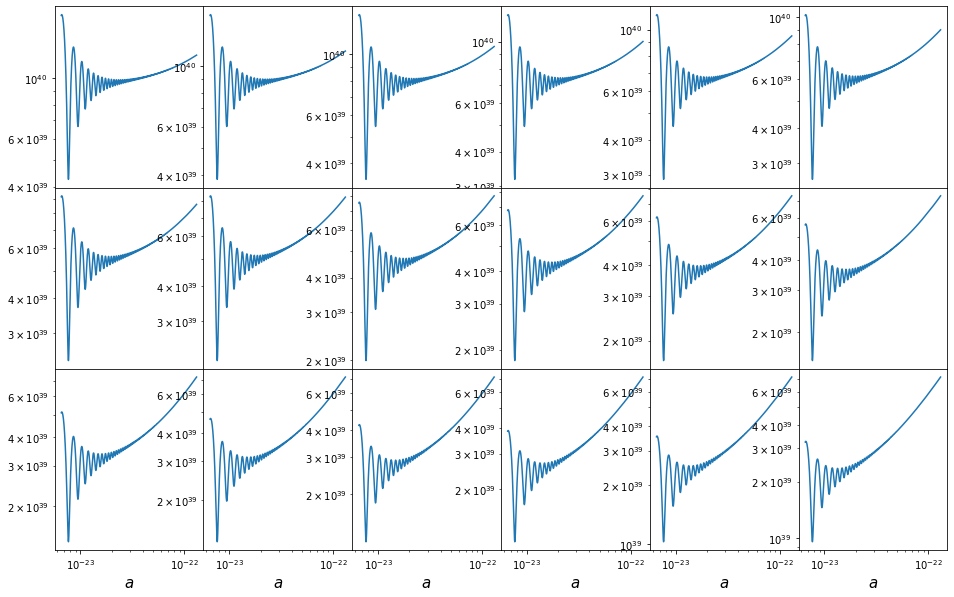

In [56]:
Dx = 3
Dy = 6
figure, axs = plt.subplots(Dx, Dy , figsize = (16,10), sharex=False, sharey=False,  gridspec_kw={'hspace': 0, 'wspace':0})
i=0

        
for i in range(Dx):
    for j in range(Dy):
#        plt.figure()
        l = (Dy*i)+j 
        
#        axs[i,j].plot(efolds_array, module(deltac_scales[l]).real/module(deltac_scales[l][0]).real,'-')
        axs[i,j].plot(ac_scales[0], module(deltac_scales[l]).real,'-')
        
#        axs[i,j].axes.get_yaxis().set_visible(False)
        axs[i,j].set_xscale('log')
        axs[i,j].set_yscale('log')
        
        axs[i,j].set_xlabel(r'$a$', fontsize=15)
        
#plt.savefig('deltas_100_k.pdf')
plt.show()

In [57]:
#Pk_real = np.zeros((len(k,len(B_arr)))
deltac_scales[:][0]

array([ 2.55552724e+39+1.67826953e+40j,  2.75899008e+39+1.67911279e+40j,
        2.95993439e+39+1.67744557e+40j, ...,
       -5.22086127e+39+1.09582924e+40j,  2.97912693e+38+1.21360066e+40j,
        5.75447701e+39+1.06902422e+40j])

In [58]:
np.shape(deltac_scales), len(t_array)

((98, 5935), 5934)

In [59]:
k_array = k_array[4.0*np.pi*(k_end**3.0)/(H_end*k_array**3.0) >= 1.0]
len(k_array)

98

In [60]:
ac_scales[-1] == ac_scales[0]

array([ True,  True,  True, ...,  True,  True,  True])

In [61]:
%%time

Pdelta_complex = np.zeros((len(k_array), (np.shape(deltac_scales))[1]))
Pzeta_complex = np.zeros((len(k_array), (np.shape(deltac_scales))[1]))


for time in range((np.shape(deltac_scales))[1]):
    for kk in range(len(k_array)):
            Pdelta_complex[kk,time] = ((k_array[kk]**3.0)*(module(deltac_scales[kk][time])**2.0)/(2.0*np.pi)).real
            Pzeta_complex[kk,time] = ((k_array[kk]**3.0)*(module(zetac_scales[kk][time])**2.0)/(2.0*np.pi)).real

CPU times: user 10.2 s, sys: 11 ms, total: 10.2 s
Wall time: 10.3 s


In [62]:
np.shape(Pdelta_complex)

(98, 5935)

In [63]:
TT = len(np.log(ac_scales[0][:]))

In [64]:
np.sqrt(10**-3)

0.03162277660168379

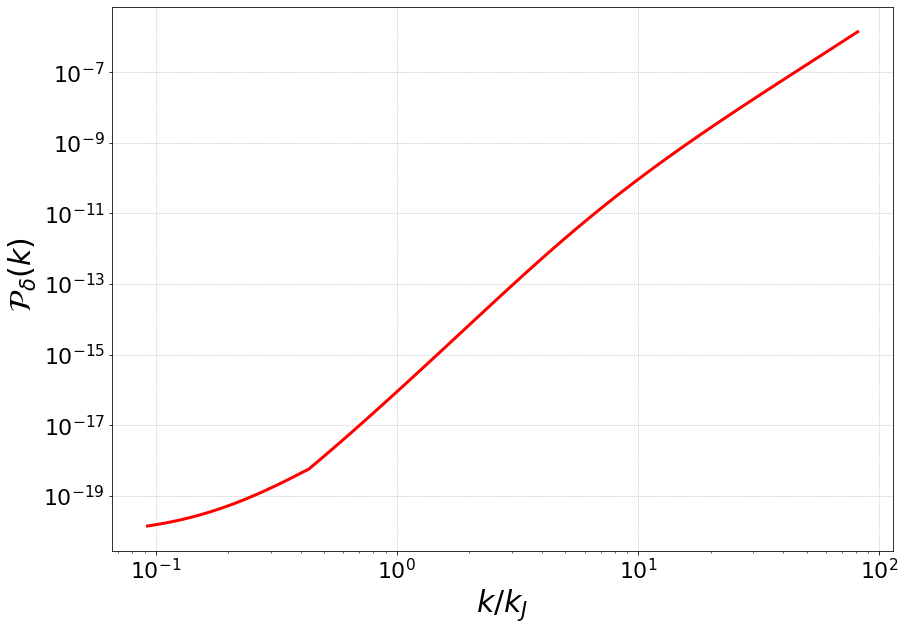

In [65]:
figure, ax = plt.subplots(1, 1,figsize = (14,10),  sharex=True)


#plt.plot(k_array/k_end, Pk_complex ,  '-', color='blue', label= r'$P_\zeta$')
#plt.plot(k_array/k_end, Pk_real ,  '-', color='magenta', label= r'$P_\zeta$')


#for i in range(TT):
#    i = i + 1
 #   if i*3000  < TT:
 #       plt.plot(k_array/k_J, Pdelta_complex[:,i],  '-', color='black')
                
#plt.plot(k_array/k_end, Pdelta_complex[:,1]/(k_array/k_end)**3.0,  '-', lw =3 , color='magenta', label= r'$t_{end}$')
plt.plot(k_array/k_J, Pdelta_complex[:,-1],  '-', lw =3 , color='red')
#plt.plot(k_array/k_end, Pdelta_complex[:,100]/(k_array/k_end)**3.0,  '-', lw =3 , color='red', label= r'$t_{rh}$')


plt.xlabel(r'$k/k_{J}$',fontsize=30)
plt.ylabel(r'$  \ \mathcal{P}_\delta(k)  $',fontsize=30)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.grid('on', ls = 'dotted')
#plt.savefig('P_delta_H_10.pdf')
plt.show()

In [66]:
Pdelta_complex[:,-1][k_array/k_end >= 1 ][0]*np.exp(10)

1.2439271151089586e-14

In [67]:
np.log(a_analytic[-1]/a_end)
np.exp(e_folds), Pzeta_complex[0,0]

(20.085536923187668, 1.8390609708876496e-20)

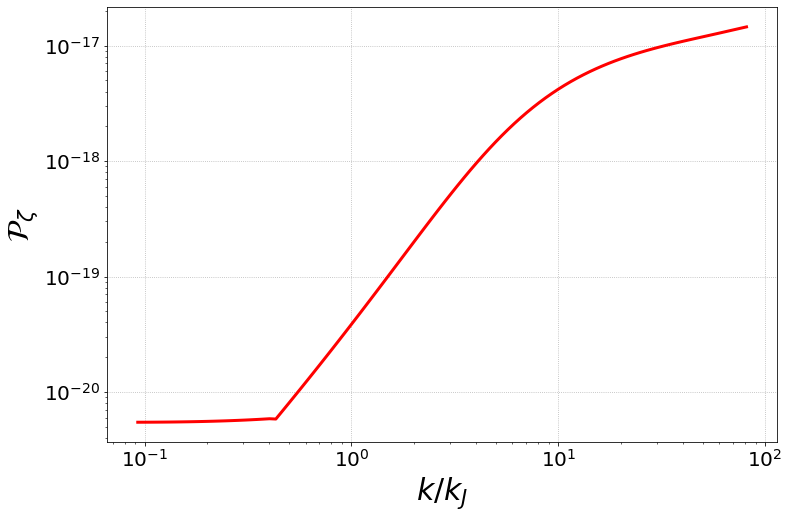

In [68]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)


#for i in range(TT):
#    i = i + 1
#    if i*3000 < TT:
#        plt.plot(k_array/k_J, Pzeta_complex[:,i*3000],  '-', color='black')
        
plt.plot(k_array/k_J, Pzeta_complex[:,-1],  '-', lw=3, color='red')


plt.xlabel(r'$k/k_{J}$',fontsize=30)
plt.ylabel(r'$\mathcal{P}_{\zeta}$',fontsize=30)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid('on', ls = 'dotted')
#plt.savefig('P_zeta_10.pdf')
plt.show()

# $1 M_{Pl} = 2.435×10^{18} GeV$
# $1 M_{Pl} = 2.17x10^{−8} kg$

In [69]:
k_eV = k_array*(2.435*(10.0**18.0))*(10.0**9.0)     # units eV
k_eV

array([2.04973932e-06, 2.19810054e-06, 2.35720022e-06, 2.52781562e-06,
       2.71078026e-06, 2.90698797e-06, 3.11739730e-06, 3.34303616e-06,
       3.58500689e-06, 3.84449159e-06, 4.12275792e-06, 4.42116532e-06,
       4.74117161e-06, 5.08434012e-06, 5.45234735e-06, 5.84699114e-06,
       6.27019946e-06, 6.72403981e-06, 7.21072938e-06, 7.73264579e-06,
       8.29233878e-06, 8.89254265e-06, 9.53618960e-06, 1.02264241e-05,
       1.09666180e-05, 1.17603877e-05, 1.26116107e-05, 1.35244458e-05,
       1.45033524e-05, 1.55531127e-05, 1.66788552e-05, 1.78860796e-05,
       1.91806835e-05, 2.05689915e-05, 2.20577860e-05, 2.36543402e-05,
       2.53664539e-05, 2.72024913e-05, 2.91714220e-05, 3.12828650e-05,
       3.35471353e-05, 3.59752947e-05, 3.85792056e-05, 4.13715889e-05,
       4.43660864e-05, 4.75773273e-05, 5.10209994e-05, 5.47139264e-05,
       5.86741493e-05, 6.29210153e-05, 6.74752717e-05, 7.23591676e-05,
       7.75965625e-05, 8.32130427e-05, 8.92360468e-05, 9.56949992e-05,
      

#### https://physics.nist.gov/cgi-bin/cuu/Convert?exp=0&num=1&From=ev&To=minv&Action=Convert+value+and+show+factor

# $1  eV = 8.065 x 10^5 m^{-1} $

In [70]:
k_mtrs = k_eV*8.06554393734921*(10.0**5.0)   # units m^-1

k_mtrs

array([   1.65322626,    1.77288765,    1.9012102 ,    2.0388208 ,
          2.18639173,    2.34464392,    2.51435049,    2.69634051,
          2.89150306,    3.10079158,    3.32522852,    3.56591032,
          3.8240128 ,    4.10079687,    4.39761471,    4.7159164 ,
          5.05725692,    5.42330386,    5.81584546,    6.23679943,
          6.68822228,    7.17231935,    7.69145562,    8.24816725,
          8.84517396,    9.48539234,   10.17195006,   10.90820119,
         11.69774257,   12.54443137,   13.45240395,   14.42609607,
         15.47026454,   16.59001048,   17.79080423,   19.07851206,
         20.45942486,   21.94028886,   23.52833859,   25.23133219,
         27.05758938,   29.01603202,   31.11622778,   33.36843683,
         35.78366195,   38.37370235,   41.15121124,   44.1297577 ,
         47.32389293,   50.74922136,   54.42247687,   58.36160456,
         62.5858484 ,   67.11584525,   71.97372566,   77.18322203,
         82.76978451,   88.76070534,   95.18525219,  102.07481

# $1 Mpc = 3.086x10^{22} m$

In [71]:
k_Mpc = k_mtrs*(3.086*(10.0**22.0))
k_Mpc

array([5.10185623e+22, 5.47113129e+22, 5.86713467e+22, 6.29180098e+22,
       6.74720487e+22, 7.23557113e+22, 7.75928560e+22, 8.32090680e+22,
       8.92317844e+22, 9.56904282e+22, 1.02616552e+23, 1.10043992e+23,
       1.18009035e+23, 1.26550591e+23, 1.35710390e+23, 1.45533180e+23,
       1.56066949e+23, 1.67363157e+23, 1.79476991e+23, 1.92467631e+23,
       2.06398540e+23, 2.21337775e+23, 2.37358320e+23, 2.54538441e+23,
       2.72962069e+23, 2.92719208e+23, 3.13906379e+23, 3.36627089e+23,
       3.60992336e+23, 3.87121152e+23, 4.15141186e+23, 4.45189325e+23,
       4.77412364e+23, 5.11967724e+23, 5.49024218e+23, 5.88762882e+23,
       6.31377851e+23, 6.77077314e+23, 7.26084529e+23, 7.78638911e+23,
       8.34997208e+23, 8.95434748e+23, 9.60246789e+23, 1.02974996e+24,
       1.10428381e+24, 1.18421245e+24, 1.26992638e+24, 1.36184432e+24,
       1.46041534e+24, 1.56612097e+24, 1.67947764e+24, 1.80103912e+24,
       1.93139928e+24, 2.07119498e+24, 2.22110917e+24, 2.38187423e+24,
      

In [72]:
R_Mpc = 2.0*np.pi/k_Mpc
R_Mpc

array([1.23154888e-22, 1.14842525e-22, 1.07091207e-22, 9.98630650e-23,
       9.31227883e-23, 8.68374479e-23, 8.09763377e-23, 7.55108242e-23,
       7.04142067e-23, 6.56615863e-23, 6.12297449e-23, 5.70970316e-23,
       5.32432565e-23, 4.96495927e-23, 4.62984839e-23, 4.31735588e-23,
       4.02595512e-23, 3.75422251e-23, 3.50083054e-23, 3.26454131e-23,
       3.04420047e-23, 2.83873157e-23, 2.64713084e-23, 2.46846224e-23,
       2.30185291e-23, 2.14648890e-23, 2.00161122e-23, 1.86651209e-23,
       1.74053150e-23, 1.62305399e-23, 1.51350565e-23, 1.41135130e-23,
       1.31609187e-23, 1.22726200e-23, 1.14442771e-23, 1.06718435e-23,
       9.95154533e-24, 9.27986387e-24, 8.65351768e-24, 8.06944684e-24,
       7.52479798e-24, 7.01691030e-24, 6.54330259e-24, 6.10166113e-24,
       5.68982834e-24, 5.30579229e-24, 4.94767682e-24, 4.61373242e-24,
       4.30232767e-24, 4.01194124e-24, 3.74115449e-24, 3.48864455e-24,
       3.25317782e-24, 3.03360396e-24, 2.82885028e-24, 2.63791649e-24,
      

In [73]:
M_H = (4.0*np.pi/(np.sqrt(H2_complex))).real  #M_Pl
M_H

array([2.16441843e+10, 2.19725147e+10, 2.23007949e+10, ...,
       1.95862170e+12, 1.95894826e+12, 1.95927483e+12])

In [74]:
M_H_kg = M_H*2.1764*(10.0**(-8.0)) 
M_H_kg.real

array([  471.06402795,   478.20981079,   485.35450127, ...,
       42627.44258266, 42634.54994991, 42641.65731715])

In [75]:
M_H_Solar = M_H_kg*(5.02785*(10**(-31)))

In [76]:
M_H_Solar

array([2.36843927e-28, 2.40436720e-28, 2.44028963e-28, ...,
       2.14324387e-26, 2.14360122e-26, 2.14395857e-26])

In [77]:
len(deltac_scales[1])

5935

In [78]:
len(Pdelta_complex[0:15])

15

In [79]:
k_array

array([8.41782064e-34, 9.02710695e-34, 9.68049373e-34, 1.03811730e-33,
       1.11325678e-33, 1.19383489e-33, 1.28024530e-33, 1.37291013e-33,
       1.47228209e-33, 1.57884665e-33, 1.69312440e-33, 1.81567364e-33,
       1.94709306e-33, 2.08802469e-33, 2.23915702e-33, 2.40122840e-33,
       2.57503058e-33, 2.76141265e-33, 2.96128516e-33, 3.17562455e-33,
       3.40547794e-33, 3.65196824e-33, 3.91629963e-33, 4.19976347e-33,
       4.50374457e-33, 4.82972799e-33, 5.17930626e-33, 5.55418719e-33,
       5.95620220e-33, 6.38731527e-33, 6.84963253e-33, 7.34541256e-33,
       7.87707741e-33, 8.44722444e-33, 9.05863902e-33, 9.71430811e-33,
       1.04174349e-32, 1.11714543e-32, 1.19800501e-32, 1.28471725e-32,
       1.37770576e-32, 1.47742483e-32, 1.58436163e-32, 1.69903856e-32,
       1.82201587e-32, 1.95389434e-32, 2.09531825e-32, 2.24697850e-32,
       2.40961599e-32, 2.58402527e-32, 2.77105839e-32, 2.97162906e-32,
       3.18671714e-32, 3.41737342e-32, 3.66472472e-32, 3.92997943e-32,
      

# $\sigma(R)^2 = \int^\infty_0 exp(-k^2 R^2) \mathcal{P}_\delta(k,t_{end}) \dfrac{dk}{k} $

In [80]:
R_array = 1.0/k_array #Mpl^{-1}
R_array

array([1.18795594e+33, 1.10777462e+33, 1.03300516e+33, 9.63282281e+32,
       8.98265359e+32, 8.37636766e+32, 7.81100312e+32, 7.28379797e+32,
       6.79217663e+32, 6.33373736e+32, 5.90624054e+32, 5.50759771e+32,
       5.13586134e+32, 4.78921540e+32, 4.46596638e+32, 4.16453513e+32,
       3.88344903e+32, 3.62133489e+32, 3.37691220e+32, 3.14898686e+32,
       2.93644539e+32, 2.73824945e+32, 2.55343078e+32, 2.38108648e+32,
       2.22037459e+32, 2.07050998e+32, 1.93076051e+32, 1.80044346e+32,
       1.67892218e+32, 1.56560301e+32, 1.45993233e+32, 1.36139392e+32,
       1.26950638e+32, 1.18382080e+32, 1.10391859e+32, 1.02940939e+32,
       9.59929207e+31, 8.95138601e+31, 8.34721050e+31, 7.78381392e+31,
       7.25844391e+31, 6.76853385e+31, 6.31169036e+31, 5.88568161e+31,
       5.48842640e+31, 5.11798401e+31, 4.77254469e+31, 4.45042087e+31,
       4.15003886e+31, 3.86993120e+31, 3.60872945e+31, 3.36515756e+31,
       3.13802561e+31, 2.92622397e+31, 2.72871792e+31, 2.54454258e+31,
      

In [81]:
sigma2_end = []
sigma2_final = []


for rr in range(len(R_array)):
    sigma2_end.append(integrate.simps(Pdelta_complex[:,0]*(np.exp(-(k_array*R_array[rr])**2.0))/k_array , k_array))
    
for rr in range(len(R_array)):
    sigma2_final.append(integrate.simps(Pdelta_complex[:,-1]*(np.exp(-(k_array*R_array[rr])**2.0))/k_array , k_array))
    

sigma2_end = np.array(sigma2_end)
sigma2_final = np.array(sigma2_final)
sigma2_final, sigma2_end

(array([2.15771791e-21, 2.80902524e-21, 3.60119606e-21, 4.55835181e-21,
        5.71044125e-21, 7.09527743e-21, 8.76123127e-21, 1.07709448e-20,
        1.32067701e-20, 1.61792321e-20, 1.98406969e-20, 2.44076422e-20,
        3.01965459e-20, 3.76807033e-20, 4.75787587e-20, 6.09912422e-20,
        7.96102094e-20, 1.06041043e-19, 1.44297422e-19, 2.00564741e-19,
        2.84380744e-19, 4.10465452e-19, 6.01562555e-19, 8.92857454e-19,
        1.33885419e-18, 2.02408842e-18, 3.07982590e-18, 4.71009928e-18,
        7.23230903e-18, 1.11405230e-17, 1.72041153e-17, 2.66213464e-17,
        4.12581954e-17, 6.40191805e-17, 9.94219614e-17, 1.54485589e-16,
        2.40099795e-16, 3.73129135e-16, 5.79634798e-16, 8.99788199e-16,
        1.39533229e-15, 2.16085878e-15, 3.34076882e-15, 5.15464956e-15,
        7.93503972e-15, 1.21833247e-14, 1.86520056e-14, 2.84651128e-14,
        4.32934747e-14, 6.56084419e-14, 9.90472273e-14, 1.48936243e-13,
        2.23037026e-13, 3.32604345e-13, 4.93880328e-13, 7.301952

In [82]:
M_array = 4.0*np.pi*(k_end**3.0)/(H_end*k_array**3.0) #Mpl 

Mpl = 2.1764*(10.0**(-8.0)) 

In [83]:
M_array = M_array[M_array>=1.0]
M_array < M_H[-1]
M_array

array([1.95927211e+12, 1.58872231e+12, 1.28825321e+12, 1.04461071e+12,
       8.47047399e+11, 6.86848498e+11, 5.56947415e+11, 4.51614037e+11,
       3.66201966e+11, 2.96943560e+11, 2.40783737e+11, 1.95245211e+11,
       1.58319215e+11, 1.28376895e+11, 1.04097454e+11, 8.44098926e+10,
       6.84457658e+10, 5.55008745e+10, 4.50042021e+10, 3.64927259e+10,
       2.95909934e+10, 2.39945597e+10, 1.94565585e+10, 1.57768125e+10,
       1.27930030e+10, 1.03735103e+10, 8.41160715e+09, 6.82075141e+09,
       5.53076824e+09, 4.48475477e+09, 3.63656990e+09, 2.94879906e+09,
       2.39110374e+09, 1.93888325e+09, 1.57218952e+09, 1.27484721e+09,
       1.03374013e+09, 8.38232733e+08, 6.79700916e+08, 5.51151628e+08,
       4.46914386e+08, 3.62391142e+08, 2.93853463e+08, 2.38278058e+08,
       1.93213422e+08, 1.56671691e+08, 1.27040961e+08, 1.03014180e+08,
       8.35314942e+07, 6.77334956e+07, 5.49233134e+07, 4.45358729e+07,
       3.61129701e+07, 2.92830593e+07, 2.37448640e+07, 1.92540868e+07,
      

In [84]:
Mend_horizon = (M_H[0].real)*2.1764*(10.0**(-8.0)) #kg
Mf_horizon = (M_H[-1].real)*2.1764*(10.0**(-8.0))  #kg

In [85]:
M_array[-1]*2.1764*(10.0**(-8.0)) 

6.284890294588446e-05

In [86]:
M_kg = M_array*2.1764*(10.0**(-8.0)) 
M_kg

array([4.26415981e+04, 3.45769524e+04, 2.80375429e+04, 2.27349075e+04,
       1.84351396e+04, 1.49485707e+04, 1.21214035e+04, 9.82892789e+03,
       7.97001958e+03, 6.46267964e+03, 5.24041725e+03, 4.24931677e+03,
       3.44565941e+03, 2.79399475e+03, 2.26557699e+03, 1.83709690e+03,
       1.48965365e+03, 1.20792103e+03, 9.79471454e+02, 7.94227687e+02,
       6.44018380e+02, 5.22217597e+02, 4.23452539e+02, 3.43366547e+02,
       2.78426918e+02, 2.25769078e+02, 1.83070218e+02, 1.48446834e+02,
       1.20371640e+02, 9.76062027e+01, 7.91463073e+01, 6.41776627e+01,
       5.20399818e+01, 4.21978550e+01, 3.42171328e+01, 2.77457746e+01,
       2.24983202e+01, 1.82432972e+01, 1.47930107e+01, 1.19952640e+01,
       9.72664469e+00, 7.88708082e+00, 6.39542677e+00, 5.18588366e+00,
       4.20509691e+00, 3.40980269e+00, 2.76491948e+00, 2.24200062e+00,
       1.81797944e+00, 1.47415180e+00, 1.19535099e+00, 9.69278737e-01,
       7.85962681e-01, 6.37316503e-01, 5.16783221e-01, 4.19045946e-01,
      

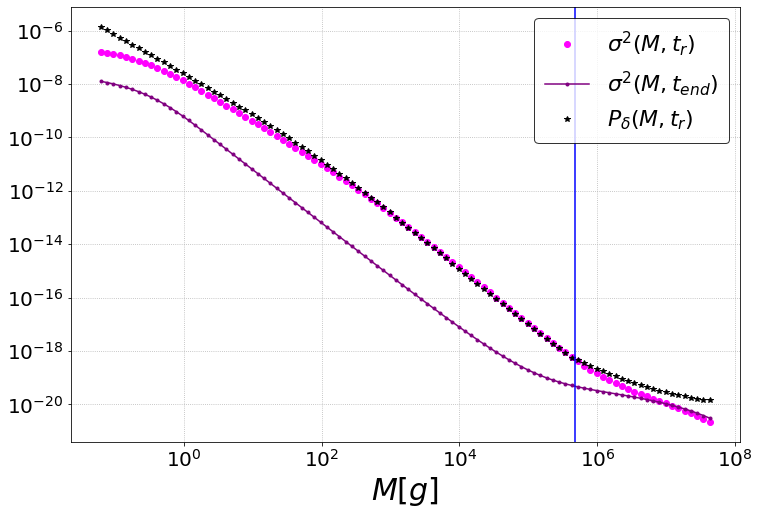

In [87]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

plt.plot( 1000.0*M_kg, sigma2_final.real,  'o' , color='magenta', label= r'$\sigma^2(M, t_r)$')
plt.plot( 1000.0*M_kg, sigma2_end.real,  '.-' , color='purple', label= r'$\sigma^2(M, t_{end})$')
plt.plot( 1000.0*M_kg, Pdelta_complex[:,-1].real,  '*' , color='black', label= r'$P_\delta(M, t_r)$')
#plt.plot( 1000.0*M_kg, np.exp(2.0*e_folds)*Pdelta_complex[:,0].real,  '.-' , color='red') 

plt.axvline(x=1000.0*Mend_horizon, color='blue', linestyle='-')


plt.xlabel(r'$M [g]$',fontsize=30)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)



leg1 = plt.legend(loc='upper right', frameon=True,  fontsize = 22, borderpad=0.5, labelspacing=0.5)
leg1.get_frame().set_edgecolor('black')

plt.grid('on', ls = 'dotted')
plt.savefig('sigma_vs_spectrum.pdf')
plt.show()

## $\mathcal{lP} = \dfrac{1}{\sqrt{2\pi} \sigma(M)} \exp \left(- \dfrac{\delta^2}{2\sigma(M)^2} \right) $

In [88]:
H_gamma = np.sqrt(H2_complex[-1].real)
H_gamma

6.4137865940995086e-12

In [89]:
delta_crit = 1.68
delta_crit_Venin = ((3.0*np.pi/2.0)**(2.0/3.0))*((H_end/H_gamma)-(a_end*H_end/k_array)**3.0)**(-2.0/3.0)
delta_crit_Venin[0] = delta_crit_Venin[1]  

delta_crit_Marti = ((3.0*np.pi/2.0)**(2.0/3.0))*(((H_end/H_gamma)*(k_array/k_end)**3.0)-1.0)**(-2.0/3.0)  
delta_crit_Marti[0] = delta_crit_Marti[1]  

delta_x = np.linspace(-100,100,10000)
delta_x, delta_crit_Venin, delta_crit_Marti

(array([-100.      ,  -99.979998,  -99.959996, ...,   99.959996,
          99.979998,  100.      ]),
 array([0.42472508, 0.42472508, 0.28587976, 0.23254124, 0.20411677,
        0.1866033 , 0.17489396, 0.16665   , 0.16063888, 0.15614546,
        0.1527248 , 0.15008496, 0.14802637, 0.14640806, 0.14512786,
        0.1441101 , 0.14329782, 0.1426475 , 0.14212556, 0.14170582,
        0.14136774, 0.14109507, 0.14087493, 0.14069706, 0.14055324,
        0.14043688, 0.14034271, 0.14026647, 0.14020472, 0.1401547 ,
        0.14011417, 0.14008133, 0.14005472, 0.14003314, 0.14001566,
        0.14000148, 0.13998999, 0.13998067, 0.13997312, 0.13996699,
        0.13996203, 0.139958  , 0.13995474, 0.13995209, 0.13994994,
        0.1399482 , 0.13994679, 0.13994565, 0.13994472, 0.13994397,
        0.13994336, 0.13994286, 0.13994246, 0.13994214, 0.13994187,
        0.13994166, 0.13994149, 0.13994135, 0.13994123, 0.13994114,
        0.13994106, 0.139941  , 0.13994095, 0.13994091, 0.13994088,
        0.13994

In [90]:
Prob_final = []
for mm in range(len(M_array)):
    Prob_final.append((np.exp(-(delta_x**2.0)/(2.0*sigma2_final[mm].real)))/(np.sqrt(2.0*np.pi*sigma2_final[mm].real)))

# the fraction of the total energy density collapsing into PBHs of mass M.
## $\beta(M) = 2 \int^\infty_{\delta_c} \mathcal{lP}(\delta) \, d\delta $

In [91]:
from scipy import special

In [92]:
len(M_array), len(delta_crit_Marti), len(sigma2_end), len(delta_crit_Venin)

(98, 98, 98, 98)

In [93]:
beta_erfc_PS = []
beta_erfc_Venin = []
beta_erfc_Marti = []

for mm in range(len(M_array)):
    beta_erfc_PS.append(special.erfc(delta_crit/(np.sqrt(2.0*sigma2_final[mm]))))
    beta_erfc_Venin.append(special.erfc(delta_crit_Venin[mm]/(np.sqrt(2.0*sigma2_final[mm]))))
    beta_erfc_Marti.append(special.erfc(delta_crit_Marti[mm]/(np.sqrt(2.0*sigma2_final[mm]))))


beta_erfc_PS = np.array(beta_erfc_PS)
beta_erfc_Venin = np.array(beta_erfc_Venin)
beta_erfc_Marti = np.array(beta_erfc_Marti)

In [94]:
dr_dm = R_array/(3.0*M_array)

dP_dr_Venin = np.diff(beta_erfc_Venin)/np.diff(R_array)
dP_dr_Marti = np.diff(beta_erfc_Marti)/np.diff(R_array)

beta_Venin = -M_array[0:-1]*dr_dm[0:-1]*dP_dr_Venin
beta_Marti = -M_array[0:-1]*dr_dm[0:-1]*dP_dr_Marti 
beta_Marti, beta_Venin

(array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00

In [95]:
M_constraint = np.linspace(1.0, 10.0**11.0, 1000)
ZEROS = np.zeros(1000)
beta_constraint = (8.0*10.0**(-28.0)*(M_constraint))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


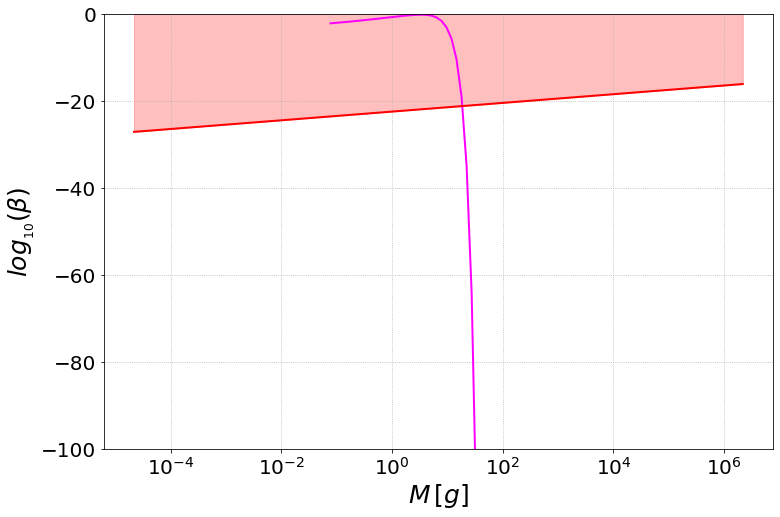

In [96]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)


plt.plot(1000.0*M_array*2.1764*(10.0**(-8.0)) , np.log10(beta_erfc_PS),  '-' , lw=2.0, color='black')

plt.plot(1000.0*M_array[0:-1]*2.1764*(10.0**(-8.0)) , np.log10(beta_Marti),  '-' , lw=2.0, color='magenta')

plt.plot(1000.0*M_array[0:-1]*2.1764*(10.0**(-8.0)) , np.log10(beta_Venin),  '-' , lw=2.0, color='blue')


plt.plot(1000.0*M_constraint*2.1764*(10.0**(-8.0)) , np.log10(beta_constraint),  '-', lw = 2 , color='red')


ax.fill_between(1000.0*M_constraint*2.1764*(10.0**(-8.0)), np.log10(beta_constraint),ZEROS,color='red', alpha=0.25)

plt.xlabel(r'$M \, [g]$',fontsize=25)
plt.ylabel(r'$log_{_{10}}(\beta)$',fontsize=25)
#plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlim(1000.0*4.341*(10.0**(-9.0)),10**-1)
plt.ylim(-100.0,0.0)

#leg1 = plt.legend( loc='lower left', frameon=True,  fontsize = 14, borderpad=0.5, labelspacing=0.5)
#leg1.get_frame().set_edgecolor('black')

plt.grid('on', ls = 'dotted')
#plt.savefig('abundances_Hend.pdf')

plt.show()

In [97]:
H_end, e_folds

(5.773502691896259e-10, 3.0)

In [98]:
len(beta_Venin) , len(M_array)

(97, 98)

In [99]:
Omega_PBH_Venin = []
Omega_PBH_Marti = []
beta_Venin_norm = []
beta_Marti_norm = []

M_PBH_Venin = []
M_PBH_Marti = []

for mm in range(len(M_array)-1):
  mm = mm + 1
  integral_venin = -1.0*integrate.simps(beta_Venin[0:mm]/M_array[0:mm], M_array[0:mm])
  integral_marti = -1.0*integrate.simps(beta_Marti[0:mm]/M_array[0:mm], M_array[0:mm])  
  if 0.0<integral_venin<1.0:
    Omega_PBH_Venin.append(integral_venin)
    M_PBH_Venin.append(M_array[mm])
    beta_Venin_norm.append(beta_Venin[mm-1])
  if 0.0<integral_marti<1.0:
    Omega_PBH_Marti.append(integral_marti)
    M_PBH_Marti.append(M_array[mm])
    beta_Marti_norm.append(beta_Marti[mm])
  else: 
    continue

In [100]:
Omega_PBH_Marti = np.array(Omega_PBH_Marti)
Omega_PBH_Venin = np.array(Omega_PBH_Venin)
M_PBH_Marti = np.array(M_PBH_Marti)
M_PBH_Venin = np.array(M_PBH_Venin)
len(M_PBH_Marti) , len(M_PBH_Venin)

(24, 0)

In [101]:
t_sec = t_array*1.35*10**(-43)
t_eva = (4.8*10**(-27))*(1000.0*M_array*2.1764*(10.0**(-8.0)))**3.0 

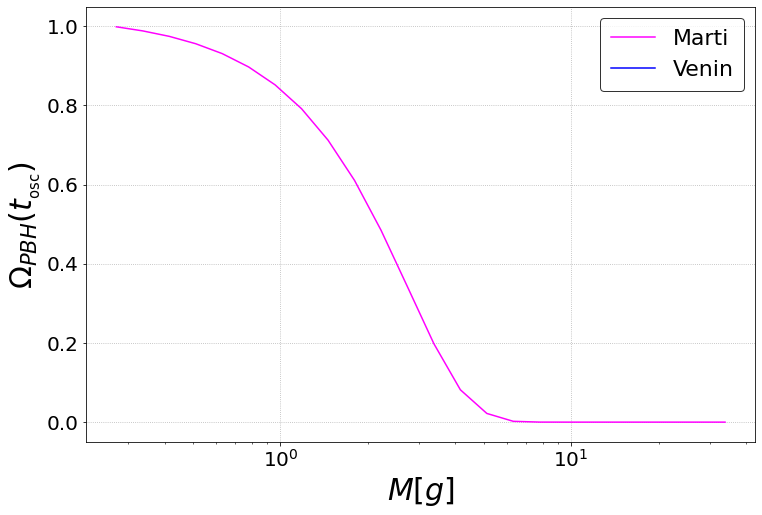

In [102]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

plt.plot( 1000.0*M_PBH_Marti*2.1764*(10.0**(-8.0)), Omega_PBH_Marti,  '-' , color='magenta', label ='Marti')
plt.plot( 1000.0*M_PBH_Venin*2.1764*(10.0**(-8.0)), Omega_PBH_Venin,  '-' , color='blue', label ='Venin')


plt.ylabel(r'$\Omega_{PBH}(t_{_{\rm osc}})$',fontsize=30)

plt.xlabel(r'$M [g]$',fontsize=30)
#plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


#plt.ylim(10.0**-20,1.0)
leg1 = plt.legend(loc='upper right', frameon=True,  fontsize = 22, borderpad=0.5, labelspacing=0.5)
leg1.get_frame().set_edgecolor('black')

plt.grid('on', ls = 'dotted')
plt.show()

In [103]:
t_eva_Marti = t_f*(5.39*10.0**(-44)) + ((5.39*10.0**(-44))*(M_PBH_Marti)**3.0)
t_eva_Marti

array([2.02989782e-25, 1.08226573e-25, 5.77023691e-26, 3.07647506e-26,
       1.64026186e-26, 8.74526623e-27, 4.66265194e-27, 2.48595448e-27,
       1.32542070e-27, 7.06667428e-28, 3.76771294e-28, 2.00882997e-28,
       1.07105927e-28, 5.71074953e-29, 3.04501990e-29, 1.62375243e-29,
       8.65985696e-30, 4.61972776e-30, 2.46568176e-30, 1.31722489e-30,
       7.04910578e-31, 3.78447457e-31, 2.04389514e-31, 1.11588320e-31])

In [104]:
t_eva_max = t_eva_Marti[0]
t_eq = 10000.0*(3.154*10.0**7.0)
t_eva_max, t_eq

(2.0298978196843814e-25, 315400000000.0)

In [105]:
Omega_bound = 0.5*(t_eq/t_eva_max)**(-1./2.0)
Omega_bound

4.011217842137192e-19

In [117]:
len(M_PBH_Marti), len(beta_Marti_norm), len(M_PBH_Venin), len(beta_Venin_norm), H_end

(24, 24, 0, 0, 5.773502691896259e-10)

In [107]:
Omega_relic_Venin = []
Omega_relic_Marti = [] 

for mm in range(len(M_PBH_Venin)):
  mm = mm + 1 
  integral_relic_Venin = -1.0*integrate.simps(beta_Venin_norm[0:mm]/M_PBH_Venin[0:mm]**2.0, M_PBH_Venin[0:mm])
  Omega_relic_Venin.append(integral_relic_Venin)

  

for mm in range(len(M_PBH_Marti)):
  mm = mm + 1
  integral_relic_Marti = -1.0*integrate.simps(beta_Marti_norm[0:mm]/M_PBH_Marti[0:mm]**2.0, M_PBH_Marti[0:mm])  
  Omega_relic_Marti.append(integral_relic_Marti)

In [113]:
M_array, M_PBH_Marti

(array([1.95927211e+12, 1.58872231e+12, 1.28825321e+12, 1.04461071e+12,
        8.47047399e+11, 6.86848498e+11, 5.56947415e+11, 4.51614037e+11,
        3.66201966e+11, 2.96943560e+11, 2.40783737e+11, 1.95245211e+11,
        1.58319215e+11, 1.28376895e+11, 1.04097454e+11, 8.44098926e+10,
        6.84457658e+10, 5.55008745e+10, 4.50042021e+10, 3.64927259e+10,
        2.95909934e+10, 2.39945597e+10, 1.94565585e+10, 1.57768125e+10,
        1.27930030e+10, 1.03735103e+10, 8.41160715e+09, 6.82075141e+09,
        5.53076824e+09, 4.48475477e+09, 3.63656990e+09, 2.94879906e+09,
        2.39110374e+09, 1.93888325e+09, 1.57218952e+09, 1.27484721e+09,
        1.03374013e+09, 8.38232733e+08, 6.79700916e+08, 5.51151628e+08,
        4.46914386e+08, 3.62391142e+08, 2.93853463e+08, 2.38278058e+08,
        1.93213422e+08, 1.56671691e+08, 1.27040961e+08, 1.03014180e+08,
        8.35314942e+07, 6.77334956e+07, 5.49233134e+07, 4.45358729e+07,
        3.61129701e+07, 2.92830593e+07, 2.37448640e+07, 1.925408

In [109]:
Omega_relic_Marti = np.array(Omega_relic_Marti)
Omega_relic_Venin = np.array(Omega_relic_Venin)

Omega_relic_Marti, Omega_relic_Venin

(array([-0.00000000e+00,  5.93322449e-72,  7.95696989e-43,  9.75578888e-27,
         3.81796756e-18,  3.59401221e-13,  1.39196958e-10,  7.37925197e-09,
         6.10290447e-08,  3.16702338e-07,  8.51106851e-07,  1.69588156e-06,
         2.71874354e-06,  3.82428159e-06,  4.92763844e-06,  5.98978019e-06,
         6.98400095e-06,  7.90603757e-06,  8.75077619e-06,  9.52562901e-06,
         1.02329725e-05,  1.08839734e-05,  1.14828711e-05,  1.20412684e-05]),
 array([], dtype=float64))

In [116]:
Omega_relic = -1.0*integrate.simps(beta_Marti_norm/M_PBH_Marti**2.0, M_PBH_Marti)  
Omega_bound, Omega_relic

(4.011217842137192e-19, 1.204126839077552e-05)

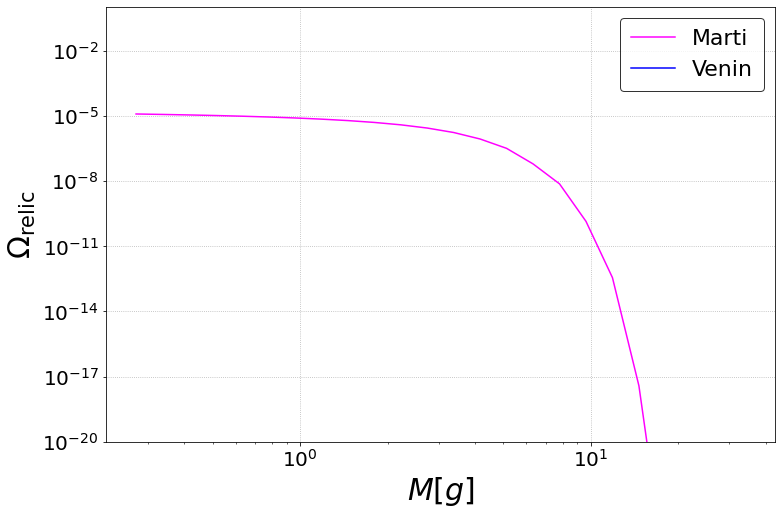

In [110]:
figure, ax = plt.subplots(1, 1,figsize = (12,8),  sharex=True)

plt.plot( 1000.0*M_PBH_Marti*2.1764*(10.0**(-8.0)), Omega_relic_Marti,  '-' , color='magenta', label ='Marti')
plt.plot( 1000.0*M_PBH_Venin*2.1764*(10.0**(-8.0)), Omega_relic_Venin,  '-' , color='blue', label ='Venin')


plt.ylabel(r'$\Omega_{\rm relic}$',fontsize=30)

plt.xlabel(r'$M [g]$',fontsize=30)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.ylim(10.0**-20,1.0)
leg1 = plt.legend(loc='upper right', frameon=True,  fontsize = 22, borderpad=0.5, labelspacing=0.5)
leg1.get_frame().set_edgecolor('black')

plt.grid('on', ls = 'dotted')
plt.show()

In [111]:
t_array[-1]*1.35*10**(-43) - t_array[0]*1.35*10**(-43)

1.3876397474088024e-32

In [112]:
Omega_PBH2

NameError: ignored

In [ ]:

# Python program to implement Runge Kutta method 
# A sample differential equation "dy / dx = (x - y)/2" 
def dydx(x, y): 
    return ((x - y)/2) 
  
# Finds value of y for a given x using step size h 
# and initial value y0 at x0. 
def rungeKutta(x0, y0, x, h): 
    # Count number of iterations using step size or 
    # step height h 
    n = (int)((x - x0)/h)  
    # Iterate for number of iterations 
    y = y0 
    for i in range(1, n + 1): 
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dydx(x0, y) 
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1) 
        k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2) 
        k4 = h * dydx(x0 + h, y + k3) 
  
        # Update next value of y 
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
  
        # Update next value of x 
        x0 = x0 + h 
    return y 
  
# Driver method 
x0 = 0
y = 1
x = 2
h = 0.2
print ('The value of y at x is:', rungeKutta(x0, y, x, h)) 
